# Unit 4 Homework

In [107]:
import pandas as pd
import scipy.stats as stats
import numpy as np

## 1 单个比例的推断

### 从某个学校随机抽取一个班级60名学生，如果男生与女生分别是26，34人，请用置信区间和零假设显著性检验两种方法，推断这个学校的男生与女生比例是否相等

$$\hat{p_1}=\frac{26}{60},\hat{p_2}=\frac{34}{60}$$
$$\Rightarrow \hat{p_1} \sim N(p_1,\frac{\hat{p_1}(1-\hat{p_1})}{n}),\hat{p_2} \sim N(p_2,\frac{\hat{p_2}(1-\hat{p_2})}{n})$$
$$\therefore \hat{p_1}-\hat{p_2}\sim N(p_1-p_2,\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+\frac{\hat{p_2}(1-\hat{p_2})}{n_2})$$

#### 1.1 CI 

In [108]:
def proportion_diff(m1,n1,m2,n2,alpha=0.05):
    p1,p2=m1/n1,m2/n2
    za=stats.norm.isf(q=alpha/2,loc=0,scale=1)
    moe=za*np.sqrt(p1*(1-p1)/n1+p2*(1-p2)/n2)
    return p1-p2-moe, p1-p2+moe
print("the 95%CI of the proportion_diff is", proportion_diff(26,60,34,60))

the 95%CI of the proportion_diff is (-0.3106552209519928, 0.04398855428532622)


95%CI包含了0，认为p1和p2没有统计显著性差异

#### 1.2 NHST

In [109]:
from statsmodels.stats.proportion import proportions_ztest

In [110]:
z, p = proportions_ztest([26,34], [60,60], alternative="two-sided")
print("枢轴量的值为", z, "，对应的p值为", p)

枢轴量的值为 -1.4605934866804426 ，对应的p值为 0.14412703481601533


综合CI和NHST，认为男生和女生的比例相等（z=-1.46, p=.144, 95%CI=[-0.311,0.0440]）

## 2 两个比例的差异的推断+RC联立表

### Prenatal vitamins and Autism

#### (a) State appropriate hypotheses to test for independence of use of prenatal vitamins during the three months before pregnancy and autism.

Let $p_1$ be the proportion of the proportion of Autism in human beings whose mum do **not** eat vitamin,while $p_2$ be another part.   
$H_0:p_1=p_2$  
$H_1:p_1\neq p_2$

#### (b) Complete the hypothesis test and state an appropriate conclusion

我要做两个独立样本的比例的z检验  
必要条件：  
1. 两个样本独立：独立，不是一个妈妈
2. 两个样本正态：样本量足够大，由中心极限定理，二项分布的和近似于正态分布
3. 已知的条件：已知的得了病和不得病的人都不少，样本的偏度不大；样本少于总体的5%，是的，全球不止9000位婴儿  

故样本满足条件，可以做z检验

In [111]:
count = [111, 143]
nobs = [181, 302]
z, p = proportions_ztest(count, nobs, alternative="two-sided")
print("枢轴量的值为", z, "，对应的p值为", p)
print("95%CI=", proportion_diff(111, 181, 143, 302))

枢轴量的值为 2.977369375514587 ，对应的p值为 0.0029073350392922167
95%CI= (0.04916981544367888, 0.23032965402322686)


根据zTest，认为在围产期服用维生素和不服用维生素所导致的新生儿自闭症比例存在显著差异（z=2.98, p=.003, 95%CI=[0.05,0.23]）

In [112]:
data = pd.DataFrame([[111,70],[143,159]],
                    index=["No vitamin", "Vitamin"],
                    columns=["Autism", "Typcial"])
print(data)
chi2,p,dof,expected=stats.chi2_contingency(data)
print("chi2=", chi2,",dof=", dof, ",p=", p)
V = (chi2 / 483) ** 0.5
print("Cramer's V=", V)
dataExp = pd.DataFrame(expected,
                    index=["No vitamin", "Vitamin"],
                    columns=["Autism", "Typcial"])
print("expected table")
print(dataExp)

            Autism  Typcial
No vitamin     111       70
Vitamin        143      159
chi2= 8.313087689634902 ,dof= 1 ,p= 0.0039360422189643465
Cramer's V= 0.13119207931983826
expected table
                Autism     Typcial
No vitamin   95.184265   85.815735
Vitamin     158.815735  143.184265


根据RC联表卡方检验，认为自闭症的比例和吃不吃维生素存在显著弱关联（chi2(1)=8.31, p=.004,Cramer's V=0.13）

#### (c)标题

原标题不太合适，检验过程用的是双边检验，不过很显然单边一定成立，可以再做一次单边检验；这个标题像广告；我拟一个："Autism is related to whether mums eat vitamin"

## 3 拟合优度检验

使用每组的中间值作为样本观测值，得到如下表格  
| |E1|E2|E3|E4|E5|E6|E7|E8|E9|E10|E11|E12|
|--|--|--|--|--|--|--|--|--|--|--|--|--|
|身高|137.5|142.5|147.5|152.5|157.5|162.5|167.5|172.5|177.5|182.5|187.5|192.5|
|人数|0|5|18|22|35|50|40|25|10|3|0|0|

### 3.1 推断这个学校的学生身高是否服从正态分布

In [119]:
#计算应该服从的正态分布参数
height = np.linspace(137.5, 192.5, 12)
num = [0,5,18,22,35,50,40,25,10,3,0,0]
total = np.repeat(height, num)
mu = np.mean(total)
s = np.var(total,ddof=1) ** 0.5
p1, p2 = stats.norm.cdf([140, 190], mu, s)
arr = np.linspace(140,185,10)
exp = stats.norm.cdf(arr+5, mu, s) - stats.norm.cdf(arr, mu, s)
exp = np.insert(exp,0,p1)
exp = np.insert(exp,len(exp),1-p2)
exp = exp * sum(num)
chi2, p =  stats.chisquare(num, exp, ddof=2)
print(chi2, p)

6.96563130353936 0.6406978176617868


根据拟合优度卡方检验的结果，身高的分布不显著不服从正态分布，chi2(df=9,N=208)=6.97,p=.64

### 3.2 推断这个学校的学生身高是否服从均值160cm，标准差15cm的正态分布

In [114]:
#仅需修改mu,s和ddof
mu = 160
s = 15
p1, p2 = stats.norm.cdf([140, 190], mu, s)
exp = stats.norm.cdf(np.linspace(140,185,10)+5, mu, s) - stats.norm.cdf(np.linspace(140,185,10), mu, s)
exp = np.insert(exp,0,p1)
exp = np.insert(exp,len(exp),1-p2)
exp = exp * 208
chi2, p = stats.chisquare(num, exp, ddof=0)
print(chi2, p)

73.36977443617435 2.7820436278085996e-11


根据拟合优度卡方检验的结果，身高的分布显著不服从均值160cm,标准差15cm的正态分布，chi2(df=11,N=208)=73.37,p=.00

### 3.3 上面的两个问题中，分别用skewness, kurtosis, shapiro 检验，qqplot来帮助判断

In [115]:
skew = stats.skew(total)
kurt = stats.kurtosis(total)
isNorm = stats.shapiro(total)
print(skew, kurt, isNorm)

-0.10726993148640684 -0.4400260980380053 ShapiroResult(statistic=0.9651120901107788, pvalue=5.185538611840457e-05)


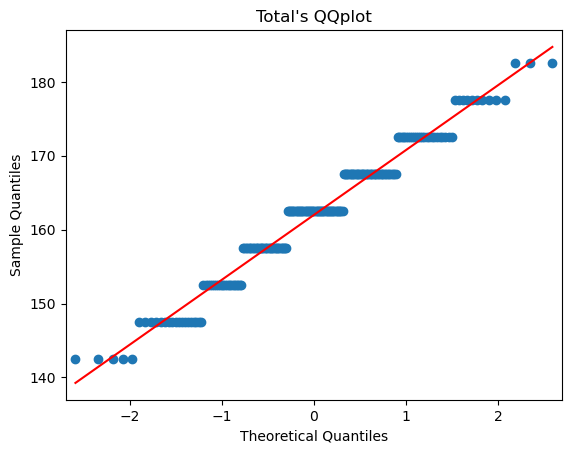

In [116]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(total,stats.norm, line='s')
plt.title("Total's QQplot")
plt.show()

由kurtosis和Shapiro检验来看，认为显著不服正态分布，而从skewness和QQplot来看，认为不显著不服从正态分布